#Parallel Forest Tutorial
This notebooke show the traing process of Parallel Random Forest. For cluster training please check https://github.com/wasit7/parallel_forest

## import modules
Import all necessary modules

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Generating datasets

In [25]:
clmax=5
spc=5e2
theta_range=2
samples=np.zeros(spc*clmax,dtype=np.uint32)
I=np.zeros((spc*clmax,theta_range),dtype=np.float32)
marker=['bo','co','go','ro','mo','yo','ko',
        'bs','cs','gs','rs','ms','ys','ks']

# number of datasets being generated 
# 8 for training
# another one for evaluation
N=9 
path="train/"
if not os.path.exists(path):
    os.makedirs(path)
for n in xrange(N):
    for cl in xrange(clmax):
        xo=cl*spc
        #define label
        samples[xo:xo+spc]=cl
        phi = np.linspace(0, 2*np.pi, spc) + \
        np.random.randn(spc)*0.4*np.pi/clmax + \
        2*np.pi*cl/clmax
        r = np.linspace(0.1, 1, spc)
        I[xo:xo+spc,:]=np.transpose(np.array([r*np.cos(phi), r*np.sin(phi)]))
    with open(path+'dataset%02d.pic'%(n), 'wb') as pickleFile:
    #write label and feature vector
        theta_dim=1
        pickle.dump((clmax,theta_dim,theta_range,len(samples),samples,I,None), pickleFile, pickle.HIGHEST_PROTOCOL)

##Visualization of the dataset

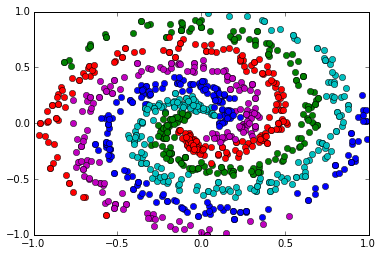

In [26]:
z=np.random.randint( 0,spc*clmax,1000)
for i in z:
    #ax.plot(dset.I[i,0],dset.I[i,1],marker[dset2.samples[i]])
    plt.plot(I[i,0],I[i,1],marker[samples[i]])
    plt.hold(True)

##Training

In [27]:
from pforest.master import master
m=master()
m.reset()
m.train()

master>>init() dsetname: dataset
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic', 'train/dataset04.pic', 'train/dataset05.pic', 'train/dataset06.pic', 'train/dataset07.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.3219
master>>reset() Q: 20000
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17RQ
master::train() node17LQ
master::train() node18L-
master::train() node17R-
master::train() node16RQ
master::train() node16L-
master::train() node15R-
master::train() node14RQ
master::train() node14L-
master::train() node13RG
master::train() node13LQ
master::train() node15LQ
master::train() node17L-
master::train() node16R-
master::train() node15R-
master::train() node14RQ
master::train() node14L-
master::train() node13R-
master::train() node12R-
master::train() node11RQ
master::train() node11LG
maste

##Write and read the tree
You may need to save/load the tree to/from a pickle file

In [28]:
with open('out_tree.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)
    
with open('out_tree.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)

##Check the file size

In [29]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A8BF-C894

 Directory of C:\Users\Wasit\Documents\GitHub\tutorials\notebooks

25/11/2015  02:51    <DIR>          .
25/11/2015  02:51    <DIR>          ..
25/11/2015  01:39    <DIR>          .ipynb_checkpoints
08/11/2015  03:02             2,280 Basic Python.ipynb
24/11/2015  23:51    <DIR>          dataset
25/11/2015  01:51             3,074 ipcluster.ipynb
25/11/2015  02:51            50,697 out_tree.pic
25/11/2015  02:51            67,568 parallel forest.ipynb
25/11/2015  00:50    <DIR>          train
               4 File(s)        123,619 bytes
               5 Dir(s)  106,478,432,256 bytes free


##The result decision tree
Termination code (Q:min bag size, G:no information gain, D:reaching maximum depth)

In [30]:
from pforest.dataset import dataset
from pforest.tree import tree

#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.322e+00,Q:020000 tau:0.545468151569 theta:[ 1.]
L- 19 H:2.312e+00,Q:017665 tau:-0.604479908943 theta:[ 0.]
L- 18 H:1.300e+00,Q:001696 tau:-0.779527366161 theta:[ 0.]
L- 17 H:6.386e-01,Q:000675 tau:0.274054408073 theta:[ 1.]
L- 16 H:3.672e-01,Q:000571 tau:-0.83270907402 theta:[ 0.]
L- 15 H:9.085e-02,Q:000462 tau:-0.960045099258 theta:[ 0.]
LQ 14 H:6.455e-01,Q:000019 (cl,P):(003,0.74) (002,0.26) (004,0.00)
R- 14 H:1.639e-02,Q:000443 tau:-0.840126633644 theta:[ 0.]
LG 13 H:1.160e-37,Q:000427 (cl,P):(003,1.00) (004,0.00) (002,0.00)
RQ 13 H:1.722e-01,Q:000016 (cl,P):(003,0.94) (004,0.06) (002,0.00)
RQ 15 H:8.064e-01,Q:000109 (cl,P):(003,0.72) (004,0.28) (002,0.00)
RQ 16 H:8.344e-01,Q:000104 (cl,P):(003,0.56) (002,0.44) (004,0.00)
R- 17 H:1.015e+00,Q:001021 tau:0.373595952988 theta:[ 1.]
L- 16 H:7.615e-01,Q:000879 tau:-0.580779314041 theta:[ 1.]
LQ 15 H:8.222e-01,Q:000070 (cl,P):(003,0.73) (004,0.27) (002,0.00)
R- 15 H:5.940e-01,Q:000809 tau:0.228774279356 theta:[ 1.]
L- 14 H:3.869

## Recall rate
Loading a new dataset, the last on, for computing a recall rate

In [31]:
#load the last dataset that never use for training
dset=dataset(8)
correct=0;
for x in xrange(dset.size):
    L=t.getL(np.array([x]),dset)
    if dset.getL(x) == L:
        correct=correct+1
    dset.setL(x,L)
print("recall rate: {}%".format(correct/float(dset.size)*100))

recall rate: 90.56%


## Labelling
The computer use the decision tree to classify the unknown feature vector u

In [32]:
#setup the new test-set
#load dataset     
dset=dataset(8)
d=0.05
y, x = np.mgrid[slice(-1, 1+d, d), slice(-1, 1+d, d)]

#start labeling
L=np.zeros(x.shape,dtype=int)
for r in xrange(x.shape[0]):
    for c in xrange(x.shape[1]):
        u=( x[r,c],y[r,c] )
        Prob=t.classify(u)
        L[r,c]=np.argmax(Prob)

##2D space partitioning by the decision tree
Displaying the labelled result

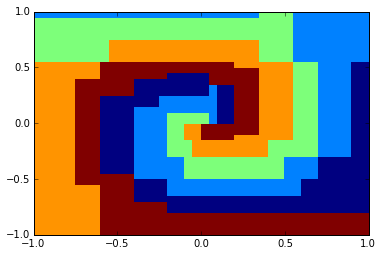

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.axis([-1,1,-1,1])
ax.pcolor(x,y,L)
ax.hold(True)

#Overlay the dataset

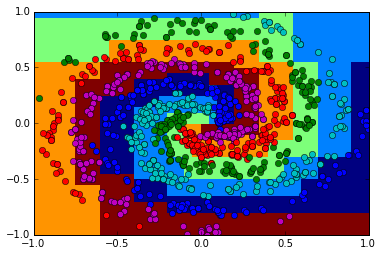

In [34]:
z=np.random.randint(0,dset.size,1000)
for i in z:
    ax.plot(dset.I[i,0],dset.I[i,1],marker[dset.samples[i]])
fig